# 시계열 자료와 확률 과정

## 확률 과정

**확률 과정(Stochastic process, Random process)**은 상호 상관 관계를 가지는 무한 개의 확률 변수의 순서열을 말한다. 확률 과정에 포함된 확률 변수는 시간 인덱스  $t$에 의해 정렬되어 있다.

 $$ Y = \{ \cdots, Y_{-2}, Y_{-1}, Y_0, Y_1, Y_2, \cdots \} $$

**시계열 자료(time series data)**란 이러한 확률 과정의 샘플이다.

$$ y = \{ \cdots, y_{-2}, y_{-1}, y_0, y_1, y_2, \cdots \} $$

시계열 자료는 다음과 같이 표기하기도 한다.

$$ \{ y_t: t=\cdots, -2, -1, 0, 1, 2, \cdots \} $$

만약 시간 인덱스 $t$를 정수만 사용한다면 이산 시간 확률 과정(discrete time stochastic process)이라고 한다. 일반적인 시계열 분석에서는 이산 시간 확률 과정을 다루지만 금융 파생 상품의 가결 결정 이론 등에서는 시간 인덱스가 임의의 실수가 될 수 있는 연속 시간 확률 과정(continuous time stochastic process)도 다룬다.

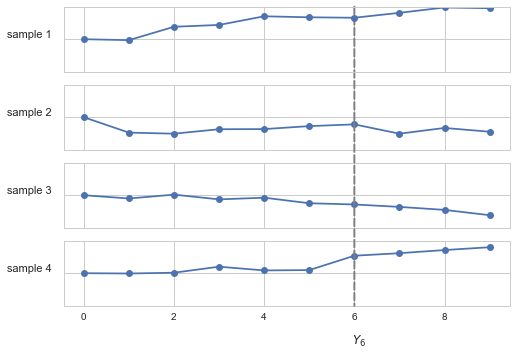

In [21]:
t = np.arange(10)
np.random.seed(99)
y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)

ax1 = plt.subplot(4, 1, 1)
ax1.plot(t, y1, '-o')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(-5, 5)
ax1.set_zorder(2)
ax1.set_ylabel("sample 1").set_rotation(0)
ax1.yaxis.set_tick_params(pad=30)

ax2 = plt.subplot(4, 1, 2)
ax2.plot(t, y2, '-o')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(-5, 5)
ax2.set_zorder(1)
ax2.set_ylabel("sample 2").set_rotation(0)
ax2.yaxis.set_tick_params(pad=30)

ax3 = plt.subplot(4, 1, 3)
ax3.plot(t, y3, '-o')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylim(-5, 5)
ax3.set_zorder(1)
ax3.set_ylabel("sample 3").set_rotation(0)
ax3.yaxis.set_tick_params(pad=30)

ax4 = plt.subplot(4, 1, 4)
ax4.plot(t, y4, '-o')
ax4.set_yticklabels([])
ax4.set_ylim(-5, 5)
ax4.set_zorder(1)
ax4.set_ylabel("sample 4").set_rotation(0)
ax4.yaxis.set_tick_params(pad=30)
ax4.annotate('$Y_6$', xy=(6 - 0.05, -11), xycoords='data', annotation_clip=False)

from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(6,5), xyB=(6,-5), ls="--", lw=2, color="gray", 
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax4)
ax1.add_artist(con);
plt.show()

예를 들어 특정 회사의 주가를 시계열 자료로 보고 이 시계열 자료가 확률 과정이라고 가정하면 우리가 보는 주가 경로 전체가 확률 과정에서 나올 수 있는 하나의 샘플일 뿐이다. 즉, 우리가 살고 있는 이 세계(지금 보고 있는 바로 그 주가 자료를 가지고 있는 세계) 자체가 확률 과정의 **하나의 샘플**이다.

이렇게 본다면 아직 실현되지 않은 미래의 주가는 어떻게 생각 할 수 있을까? 확률 과정의 샘플은 음의 무한대부터 양의 무한대까지 모든 시간에 대한 자료를 가지고 있으므로 미래의 주가도 이미 실현(샘플링)되어 있는 것으로 생각하면 이해하기 쉽다. 이러한 관점으로 보면 미래는 전체 시계열 자료 중 현재 시점에서 아직 관찰이 불가능한 부분일 뿐이다.

이러한 관점은 연속시간 확률과정을 분석할 때 중요한 역할을 한다. 그러나 이산시간 확률과정의 경우에는 단순히 **서로 상관관계를 가지는 복수개의 확률변수**로 보아도 큰 문제가 없다.

***
연습해보기

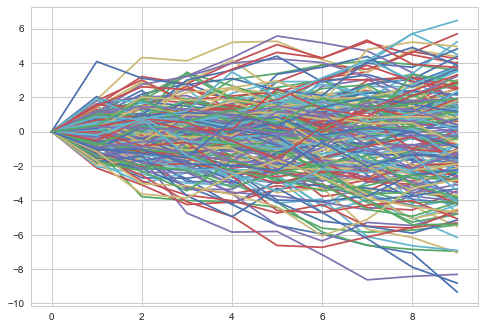

In [99]:
x = np.zeros((200, 10))
n = 0
for n in range(200):
    x[n] = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
    n += 1

y = x.T
plt.plot(y)
plt.show()

In [119]:
np.mean(y[1])

-0.048943613016185418

In [120]:
np.mean(y[9])

-0.54287457787519866

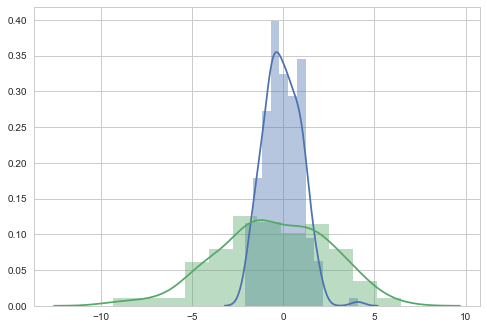

In [121]:
sns.distplot(y[1])
sns.distplot(y[9])
plt.show()

***

## 앙상블 평균

이러한 관점에서 확률 과정 $Y$의 특정 시간에 대한 기댓값 $\text{E}[Y_t]$은 이렇게 생성된 복수의 시계열 자료 샘플에서 특정 시간 $t$의 값만을 평균한 것으로 볼 수 있다. 이를 시계열의 **앙상블 평균**(ensemble average)라고 한다. 

재현이 가능한 확률 과정, 예를 들어 반복하여 시행할 수 있는 실험(experiment)의 데이터와 같은 경우에는 앙상블 평균의 추정값을 계산할 수 있다. 하지만  재현이 불가능한 확률 과정에 대해서는 특정시간의 값에 대한 앙상블 평균의 추정값은 현실적으로 얻을 수 없다. 이 경우 우리가 살고 있는 세계는 **하나의 샘플만을 가진 세계**이기 때문이다.

앙상블 평균에 대한 추정값을 얻기 위해서는 확률 과정이 정상 과정(stationary process)이며 에르고딕 과정(ergodic process)이라는 가정이 있어야 한다. 정상 과정과 에르고딕 과정에 대해서는 추후 자세히 설명한다.

## 확률 과정의 기댓값, 자기공분산, 자기상관계수

확률 과정의 특성은 개별 시간 인덱스에 대한 확률 변수들의 결합 확률 밀도 함수를 사용하여 정의한다.

**확률 과정의 기대값**은 보통 $\mu_t$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$의 기댓값이다.

$$ \mu_t = \text{E}[Y_t] $$

**확률 과정의 자기공분산(auto-covariance)**은 보통 $\gamma_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 공분산이다. 

$$ \gamma_{t,s} = \text{Cov}[Y_t, Y_s]  = \text{E}\left[(Y_t-\text{E}[Y_t])(Y_s-\text{E}[Y_s])\right] $$


**확률 과정의 자기상관계수(auto-correlation)**은 보통 $\rho_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 상관계수이다. 

$$ \rho_{t,s} = \text{Corr}[Y_t, Y_s] = \dfrac{ \text{Cov}[Y_t, Y_s] }{\sqrt{\text{Var}[Y_t]\text{Var}[Y_s]}} = \dfrac{\gamma_{t,s}}{\sqrt{\gamma_t\gamma_s}} $$


위의 정의에서 다음과 같은 성질을 만족함을 알 수 있다.

$$
\begin{eqnarray}
\gamma_{t,t} &=& \text{Var}[Y_t] \\
\gamma_{t,s} &=& \gamma_{s,t} \\
\left| \gamma_{t,s} \right| &\leq& \sqrt{\gamma_{t,t} \gamma_{s,s} } \\
\rho_{t,t} &=& 1 \\
\rho_{t,s} &=& \rho_{s,t} \\
\left| \rho_{t,s} \right| &\leq& 1 \\
\end{eqnarray}
$$

# 정상 확률 과정과 비정상 확률 과정

## 정상 확률 과정

***
정상: normal(X), stationary 정적인 <-> 동적인
***

**협의의 정상 확률 과정(strictly stationary process, strong stationary process)**은 확률 과정의 모든 모멘트(moment)가 시간 차이(time lag)에만 의존하고 절대 시간에 의존하지 않는 것이다.

이를 수학적으로 표현하면 임의의 $t$, $s$, $k_i$에 대해 
$$ \text{E}[Y_{t} Y_{t+k_1} Y_{t+k_2} \cdots Y_{t+k_i} \cdots ] = \text{E}[Y_s Y_{s+k_1} Y_{s+k_2} \cdots Y_{s+k_i} \cdots] $$ 
가 성립한다.

즉. 기댓값의 경우
$$ \text{E}[Y_{t}] = \text{E}[Y_{s}] = \mu $$ 
가 성립하고 

자기공분산의 경우
$$ \text{E}[Y_{t}Y_{t+k}] = \text{E}[Y_{s}Y_{s+k}] = f(k) $$ 
가 성립한다.

위 두가지 조건만 성립하는 경우에는 **광의의 정상 확률 과정(wide-sense stationary process, weak stationary process)**라고 한다.

**정상 확률과정에서는 자기공분산이 두 시간 인덱스의 차이 즉 시차(lag) $k$에만 의존하므로** 자기공분산을 다음과 같이 표기하며 시차에 대한 1차원 함수가 된다. 따라서 자기공분산함수(auto covariance function)라고도 한다.

$$ \gamma_{t,t+k} =  \gamma_{0,k} \triangleq  \gamma_k $$

정상 확률 과정의 자기상관계수도 마찬가지로 시차 $k$에만 의존한다. 이를 자기상관계수 함수(auto-correlation function) 줄여서 ACF라고 한다.

$$ \rho_{t,t+k} = \rho_{0,k} \triangleq \rho_k = \dfrac{\gamma_k}{\gamma_0} $$

정상 확률 과정은 다음과 같은 성질을 만족한다.

$$
\begin{eqnarray}
\gamma_0 &=& \text{Var}[Y_t] \\
\gamma_{k} &=& \gamma_{-k} \\
\left| \gamma_{k} \right| &\leq& \gamma_{0}  \\
\rho_{0} &=& 1 \\
\rho_{k} &=& \rho_{-k} \\
\left| \rho_{k} \right| &\leq& 1 \\
\end{eqnarray}
$$

## 에르고딕 확률 과정

정상 확률 과정에 대해서는 다음과 같이 에르고딕 성질(ergodicity)을 가정할 수 있다.

에르고딕 확률 과정(ergodic process)은 모멘트에 대한 **시간 평균값이 앙상블 기댓값으로 수렴**하는 정상 확률 과정을 말한다.

기댓값의 경우,

$$ \text{E}[Y_t] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t dt $$

자기공분산의 경우

$$ \text{E}[Y_{t}Y_{t+k}] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t Y_{t+k} dt $$

가 성립한다.

에르고딕 확률 과정에 대해서는 하나의 샘플 즉 시계열 자료만 가지고도 기댓값과 자기공분산을 추정할 수 있기 때문에 대부분의 시계열 분석에서는 특별히 명시하지 않더라도 에르고딕 확률 과정을 가정하는 경우가 많다.

다음 파이썬 코드는 에르고딕 확률 과정의 샘플에서 기댓값과 lag 0의 자기공분산을 추정하는 예이다.

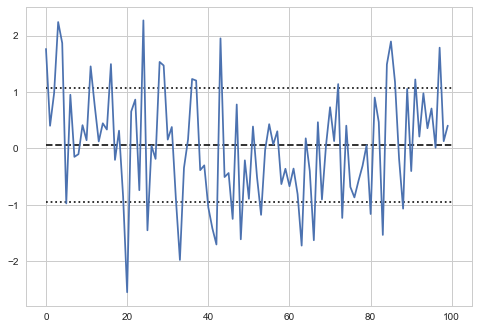

In [122]:
np.random.seed(0)
N = 100
t = np.arange(N)
y = sp.stats.norm.rvs(size=N)
mean = np.mean(y)
var = np.var(y)
plt.plot(t, y)
plt.hlines(mean, 0, N, linestyle='--')
plt.hlines(np.sqrt(var)+mean, 0, N, linestyle=':')
plt.hlines(-np.sqrt(var)+mean, 0, N, linestyle=':')
plt.show()

## 비정상 확률 과정

정상 확률 과정이 아닌 확률 과정이 **비정상 확률 과정(non-stationary process)**이다. 

비정상 확률 과정이 되는 경우는 

* 추세를 가지는 경우. 일차 모멘트 즉, 기댓값 $\text{E}[y_t]$이 0이 아니며 시간에 따라 변화함
* 추세가 없지만 $\text{E}[y_t] = 0 $이지만 분산 $\text{Var}[y_t]$ 이 시간에 따라 변하는 경우

등이 있다. 

이 중 두번째 경우를 살펴보자. 

다음 시계열 자료들은 동일한 확률 과정의 샘플들이다. 하나 하나의 샘플(시계열 자료)만 보면 마치 추세가 있는 것처럼 보인다. 그러나 이는 확률 과정의 분산 $\text{Var}[y_t]$이 시간 $t$에 따라 커지기 때문이다. 그래프에 표시하였듯이 $t=400$에서의 분산 $\text{Var}[y_{400}]$은 $t=100$에서의 분산 $\text{Var}[y_{100}]$보다 크다.


이런 경우 보통 **확률적 추세(stochastic trend)**를 가진다고 말하기도 한다. 그러나 이 용어는 명확한 학술적인 정의는 아니다.

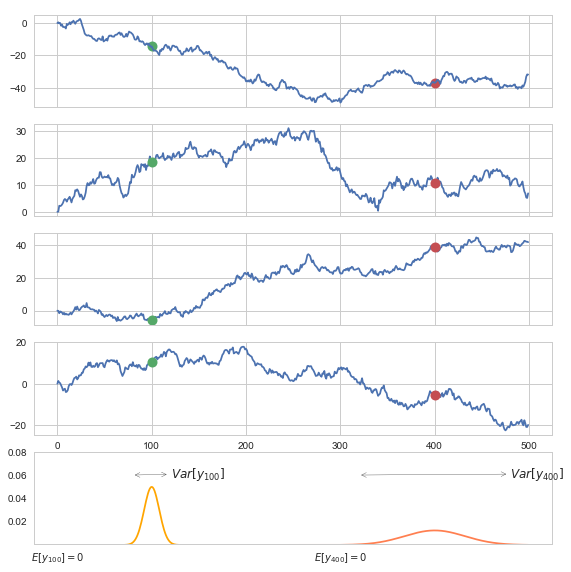

In [123]:
N = 500; t1 = 100; t2 = 400
t = np.arange(N)

np.random.seed(12); y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(18); y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(22); y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(24); y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)

plt.figure(figsize=(8,8))

ax1 = plt.subplot(5, 1, 1); plt.plot(t, y1); ax1.set_zorder(2); ax1.set_xticklabels([]); 
ax2 = plt.subplot(5, 1, 2); plt.plot(t, y2); ax2.set_zorder(1); ax2.set_xticklabels([]); 
ax3 = plt.subplot(5, 1, 3); plt.plot(t, y3); ax3.set_zorder(1); ax3.set_xticklabels([]); 
ax4 = plt.subplot(5, 1, 4); plt.plot(t, y4); ax4.set_zorder(1); 

ax5 = plt.subplot(5, 1, 5); ax5.set_zorder(1); ax5.set_xticklabels([]); ax5.grid(False)
ax5.plot(t, sp.stats.norm(t1, 0.08*t1).pdf(t), 'orange')
ax5.plot(t, sp.stats.norm(t2, 0.08*t2).pdf(t), 'coral')
ax5.set_ylim(0.001, 0.08);
ax5.set_xticklabels(["", "$E[y_{100}] = 0$", "", "", "$E[y_{400}] = 0$"])

ax5.annotate("$Var[y_{100}]$", xy=(t1-20, 0.06), xytext=(t1+20, 0.058), arrowprops=dict(arrowstyle="<->"))
ax5.annotate("$Var[y_{400}]$", xy=(t2-80, 0.06), xytext=(t2+80, 0.058), arrowprops=dict(arrowstyle="<->"))


from matplotlib.patches import ConnectionPatch
con1 = ConnectionPatch(xyA=(t1, 10), xyB=(t1,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5, zorder=2)
ax1.add_artist(con1);
con2 = ConnectionPatch(xyA=(t2, 10), xyB=(t2,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5)
ax1.add_artist(con2);

ax1.plot(t1, y1[t1], 'o', markersize=10, zorder=1); ax1.plot(t2, y1[t2], 'o', markersize=10, zorder=1);
ax2.plot(t1, y2[t1], 'o', markersize=10); ax2.plot(t2, y2[t2], 'o', markersize=10); 
ax3.plot(t1, y3[t1], 'o', markersize=10); ax3.plot(t2, y3[t2], 'o', markersize=10); 
ax4.plot(t1, y4[t1], 'o', markersize=10); ax4.plot(t2, y4[t2], 'o', markersize=10); 

plt.tight_layout(h_pad=0.1)
plt.show()

# 백색 잡음

시계열 분석을 구성하는 여러가지 기본 모형 중 가장 중요한 것이 바로 **백색 잡음(white noise)**이다. 

백색 잡음 $e$은 확률 과정을 구성하는 모든 개별 확률 변수 $e_t$들이 서로 독립이고(independent) 동일한 확률 분포를 따르는(identically distributed) 확률 과정을 말한다. 이러한 가정을 약자로 $i.i.d$ 가정이라고 한다. 백색 잡음의 기반이 되는 확률 변수의 분포가 반드시 정규 분포일 필요는 없다.

$$ e_t \sim i.i.d \;\; \text{ for all } t$$

백색 잡음은 다음과 같은 특성을 만족한다.

* 정상 과정(stictly stationary process)이다.

* 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0이다.
$$ \gamma_l = \begin{cases} \text{Var}[e_t] & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$

* 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0이다.
$$ \rho_l = \begin{cases} 1 & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$


## 가우시안 백색 잡음

확률 분포가 표준 가우시안 정규 분포인 백색 잡음을 가우시안 백색 잡음(Gaussina white noise)라고 한다. 

$$ e_t \sim i.i.d \; N(\mu, \sigma^2) \;\; \text{ for all } t$$


가우시안 백색 잡음은 다음과 같이 시뮬레이션 할 수 있다.

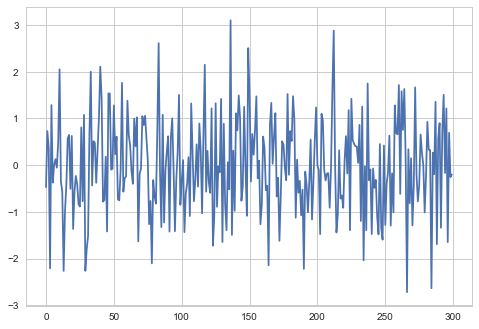

In [126]:
e = sp.stats.norm.rvs(size=300)
plt.plot(e);
plt.show()

## 비-가우시안 백색 잡음

앞서 밝혔지만 백색 잡음을 이루는 기반 확률 분포가 반드시 정규 분포일 필요는 없다. 예를 들어 가장 단순한 경우로서 $\{1, -1\}$로 구성되고 1이 나올 확률 $p=0.5$인  베르누이 확률 과정도 백색 잡음이 된다.

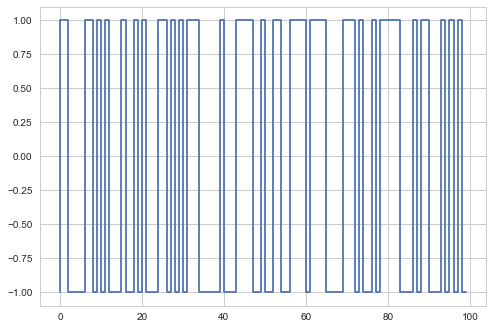

In [125]:
e = sp.stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(e)), e)
plt.ylim(-1.1, 1.1)
plt.show()

## 백색 잡음의 스펙트럼

백색 잡음에 대한 파워 스펙트럼을 구하면 이론적으로는 평평한(flat) 형태가 된다. 시계열의 파워 스펙트럼을 평평하게 만드는 필터를 적용하는 것을 **백색화(whitening)**라고도 한다.

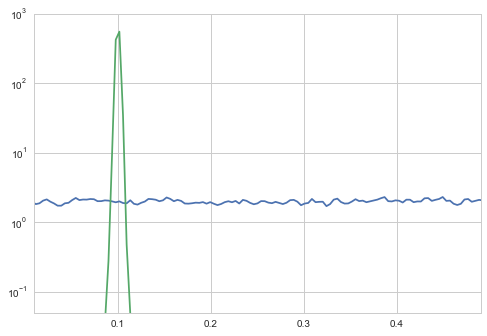

In [124]:
import scipy.signal
sp.random.seed(0)
N = 2**15
e = sp.stats.bernoulli.rvs(0.5, size=N) * 2 - 1

f1, P1 = sp.signal.welch(e)
plt.semilogy(f1, P1);

# 비교를 위한 단일 주파수 신호 (mono tone)
fs = 10e3; N = 1e5; amp = 2*np.sqrt(2); freq = 1000; noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
s = amp*np.sin(2*np.pi*freq*time)

f2, P2 = sp.signal.welch(s)
plt.semilogy(f2, P2);
plt.xlim([0.01, 0.49])
plt.ylim([0.5e-1, 1e3])
plt.show()

# 이산 시간 랜덤 워크

비정상 확률 과정의 대표적인 예가 랜덤 워크(random walk)이다. 여기에서는 시간 인덱스가 연속적이지 않은 이산 시간(discrete-time) 랜덤 워크를 소개한다.

이산 시간 랜덤 워크는 백색 잡음(white noise)을 누적한 값으로 이루어진 확률 과정을 말한다.

수식으로 정의하면 다음과 같다.

$$ 
\begin{eqnarray}
W_1 &=& e_1 \\
W_2 &=& e_1 + e_2 \\
\vdots &=& \vdots \\
W_t &=& e_1 + e_2 + \cdots + e_t \\
\end{eqnarray}
$$

또는

$$ W_t = W_{t-1} + e_t $$


이산 시간 랜덤 워크는 다음과 같은 특성을 가진다.

* 기댓값은 0

$$ \text{E}[W_t] = 0 $$

$$ \text{E}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t \right] = \sum_{i=1}^t \text{E} \left[ e_t \right] = 0 $$
* 분산은 시간에 비례

$$ \text{Var}[W_t] = t\sigma_e^2 $$

$$ \text{Var}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 

* 자기공분산은 두 시간 중 빠른 시간에 비례

$$ \gamma_{t,s} =  \gamma_{s, t} = t\sigma_e^2  \; \text{ if } t < s $$

$$ \gamma_{t,s} = \text{Cov}[W_t, W_s] = \text{E} \left[ \sum_{i=1}^t e_t \sum_{i=1}^s e_s \right]  = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 


* 자기상관계수는 두 시간의 비율의 제곱근에 비례

$$ \rho_{t,s} = \rho_{s,t} = \sqrt{\dfrac{t}{s}}  \; \text{ if } t < s $$

$$ \rho_{t,s} = \dfrac{\text{Cov}[W_t, W_s]}{\sqrt{\text{Var}[W_t]\text{Var}[W_s]}} 
= \dfrac{t\sigma_e^2}{\sqrt{t\sigma_e^2 s\sigma_e^2}} = \sqrt{\dfrac{t}{s}}  $$ 


이산 시간 랜덤 워크는 백색 잡음에 대한 누적합(cumsum)으로 구현할 수 있다.

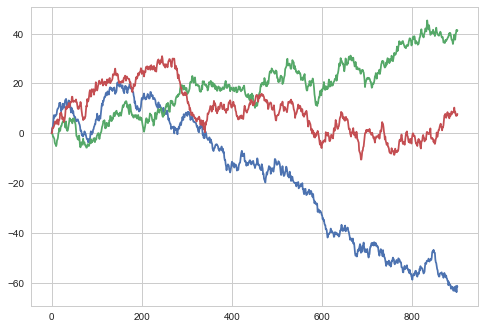

In [127]:
for i in range(3):
    np.random.seed(9*i)
    e = sp.stats.norm.rvs(size=900)
    W = np.insert(np.cumsum(e), 0, 0)
    plt.plot(W);
plt.show()

# 일반 선형 확률 과정 모형

정상 확률 과정(stationary process)에서 가장 일반적으로 사용되는 모형은 **일반 선형 확률 과정 모형(general linear process model)**이다. 일반 선형 확률 과정 모형은 시계열이 **가우시안 백색 잡음의 현재 값과 과거 값들의 선형 조합으로 이루어져 있다**고 가정한다. 이 수식에서 $e_t$는 가우시안 백색 잡음이고 $\psi$는 백색 잡음에 곱해지는 가중 계수(weight coefficient)이다.


$$ Y_t = e_t + \psi_1 e_{t-1}  + \psi_2 e_{t-2}  + \psi_1 e_{t-3}  + \cdots $$

이 모형을 블럭 다이어그램으로 나타내면 다음과 같다. 이 다이어그램에서 $D$는 신호가 저장되었다가 다음 시간에 나오는 일종의 저장 장치이다. 지연(delay, lag) 요소라고 불린다.

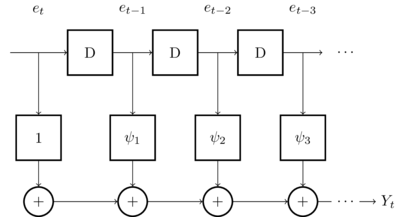

In [5]:
%%tikz    

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (-2,0) (input) {};
\node [block] (d1) {D};
\draw[->] (input) -- (d1);
\path (input) -- coordinate(b1) (d1);
\node [above of=b1]  {$e_{t}$};
\node [block, below of=b1] (c1) {1};
\draw[->] (b1) -- (c1);
\node [sum, below of=c1] (s1) {+};
\draw[->] (c1) -- (s1);

\node [block, right of=d1] (d2) {D};
\draw[->] (d1) -- (d2);
\path (d1) -- coordinate(b2) (d2);
\node [above of=b2]  {$e_{t-1}$};
\node [block, below of=b2] (c2) {$\psi_1$};
\draw[->] (b2) -- (c2);
\node [sum, below of=c2] (s2) {+};
\draw[->] (c2) -- (s2);
\draw[->] (s1) -- (s2);

\node [block, right of=d2] (d3) {D};
\draw[->] (d2) -- (d3);
\path (d2) -- coordinate(b3) (d3);
\node [above of=b3]  {$e_{t-2}$};
\node [block, below of=b3] (c3) {$\psi_2$};
\draw[->] (b3) -- (c3);
\node [sum, below of=c3] (s3) {+};
\draw[->] (c3) -- (s3);
\draw[->] (s2) -- (s3);

\node [dots, right of=d3] (d4) {$\cdots$};
\draw[->] (d3) -- (d4);
\path (d3) -- coordinate(b4) (d4);
\node [above of=b4]  {$e_{t-3}$};
\node [block, below of=b4] (c4) {$\psi_3$};
\draw[->] (b4) -- (c4);
\node [sum, below of=c4] (s4) {+};
\draw[->] (c4) -- (s4);
\draw[->] (s3) -- (s4);

\node [right of=s4] (dots) {$\cdots$};
\node [right of=dots] (output) {$Y_t$};

\draw[-] (s4) -- (dots);
\draw[->] (dots) -- (output);


다만 선형 확률 과정 모형이 성립하려면 계수들이 다음 조건을 만족해야 한다. 이 조건은 전체 항들의 합이 수렴하도록 즉, 전체 값의 크기가 과도하게 커지지 않도록 하는 역할을 한다.

$$ \sum_{i=1}^{\infty} \psi_i^2 < \infty $$

일반 선형 확률 과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형으로 분류할 수 있다


* MA (Moving Average) 모형
* AR (Auto-Regressive) 모형
* ARMA (Auto-Regressive Moving Average) 모형

MA 모형은 일반 선형 확률 모형의 차수가 유한(finite)한 경우를 말한다. $q$차수의 MA 모형은 MA(q)로 표기하며 다음 수식을 만족한다.

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots - \theta_q e_{t-q} $$

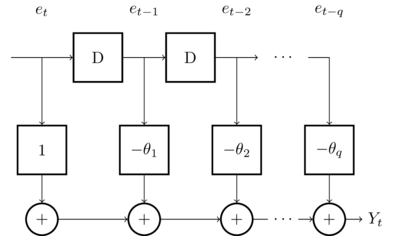

In [6]:
%%tikz    

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (-2,0) (input) {};
\node [block] (d1) {D};
\draw[->] (input) -- (d1);
\path (input) -- coordinate(b1) (d1);
\node [above of=b1]  {$e_{t}$};
\node [block, below of=b1] (c1) {1};
\draw[->] (b1) -- (c1);
\node [sum, below of=c1] (s1) {+};
\draw[->] (c1) -- (s1);

\node [block, right of=d1] (d2) {D};
\draw[->] (d1) -- (d2);
\path (d1) -- coordinate(b2) (d2);
\node [above of=b2]  {$e_{t-1}$};
\node [block, below of=b2] (c2) {$-\theta_1$};
\draw[->] (b2) -- (c2);
\node [sum, below of=c2] (s2) {+};
\draw[->] (c2) -- (s2);
\draw[->] (s1) -- (s2);

\node [dots, right of=d2] (d3) {$\cdots$};
\draw[->] (d2) -- (d3);
\path (d2) -- coordinate(b3) (d3);
\node [above of=b3]  {$e_{t-2}$};
\node [block, below of=b3] (c3) {$-\theta_2$};
\draw[->] (b3) -- (c3);
\node [sum, below of=c3] (s3) {+};
\draw[->] (c3) -- (s3);
\draw[->] (s2) -- (s3);

\node [dots, right of=d3] (d4) {};
\path (d3) -- coordinate(b4) (d4);
\node [above of=b4]  {$e_{t-q}$};
\node [block, below of=b4] (c4) {$-\theta_q$};
\draw[->] (d3) -| (c4);
\node [right of=s3] (dots) {$\cdots$};
\draw[-] (s3) -- (dots);
\node [sum, below of=c4] (s4) {+};
\draw[->] (c4) -- (s4);

\node [right of=s4] (output) {$Y_t$};
\draw[<-] (s4) -- (dots);
\draw[->] (s4) -- (output);


AR 모형은 자기 자신의 과거값에 의존적인 모형을 말한다.  $p$차수의 AR 모형은 AR(p)로 표기하며 다음 수식을 만족한다.

$$ Y_t = \phi_1 Y_{t-1}  + \phi_2 Y_{t-2}  + \cdots + \phi_p Y_{t-p}  + e_t $$

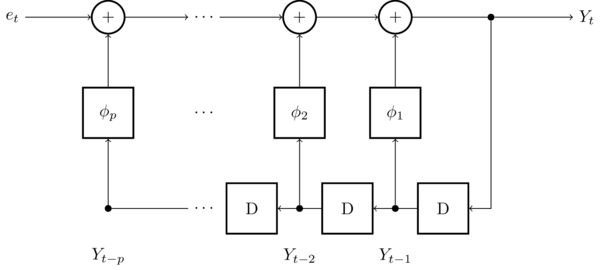

In [7]:
%%tikz --size 600,300 

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (0,0) (e) {$e_t$};
\node [sum] at (2,0) (s1) {+};
\node       at (4,0) (s2) {$\cdots$};
\node [sum] at (6,0) (s3) {+};
\node [sum] at (8,0) (s4) {+};
\node [block] at (2,-2) (b1) {$\phi_p$};
\node         at (4,-2) (b2) {$\cdots$};
\node [block] at (6,-2) (b3) {$\phi_2$};
\node [block] at (8,-2) (b4) {$\phi_1$};
\node [branch] at (2,-4) (bb1) {};
\node          at (4,-4) (bb2) {$\cdots$};
\node [branch] at (6,-4) (bb3) {};
\node [branch] at (8,-4) (bb4) {};
\node [branch] at (10,0) (by) {};
\node [block]  at (9,-4) (d4) {D};
\node [block]  at (7,-4) (d3) {D};
\node [block]  at (5,-4) (d2) {D};
\node [below of=bb4]  {$Y_{t-1}$};
\node [below of=bb3]  {$Y_{t-2}$};
\node [below of=bb1]  {$Y_{t-p}$};
\node at (10,-4) (bby) {};
\node at (12,0) (y) {$Y_t$};

\draw[->] (e) -- (s1);
\draw[->] (s1) -- (s2);
\draw[->] (s2) -- (s3);
\draw[->] (s3) -- (s4);
\draw[->] (b1) -- (s1);
\draw[->] (b3) -- (s3);
\draw[->] (b4) -- (s4);
\draw[-] (s4) -- (by);
\draw[->] (by) -- (y);
\draw[->] (by) |- (d4);
\draw[->] (d4) -- (d3);
\draw[->] (d3) -- (d2);
\draw[->] (bb2) -| (b1);
\draw[->] (bb4) -- (b4);
\draw[->] (bb3) -- (b3);

***
연습해보기

In [434]:
length = 10
et = sp.stats.norm(0, 1)
rvs = et.rvs(length)
rvs

array([ 0.17455113,  1.07386673, -1.00701546, -1.39423129,  0.63919504,
       -0.91752066,  1.21354341, -1.98936747, -1.37229418, -1.25004117])

In [435]:
ex1 = np.zeros(length)
def ma1(x):
    for i in range(len(x)):
        et = 1
        et_1 = x[i]
        ex1[i] =  et + et_1
    return ex1

In [436]:
e1 = ma1(rvs)
e1

array([ 1.17455113,  2.07386673, -0.00701546, -0.39423129,  1.63919504,
        0.08247934,  2.21354341, -0.98936747, -0.37229418, -0.25004117])

In [437]:
ex2 = np.zeros(length)
def ma2(x):
    for i in range(len(x)):
        et = 1
        et_1 = x[i]
        et_2 = x[i-1]
        ex2[i] = et - et_1 + 0.6 * et_2
    return ex2[1:]

In [438]:
e2 = ma2(rvs)
e2

array([ 0.03086394,  2.6513355 ,  1.79002201, -0.47573381,  2.30103768,
       -0.76405581,  3.71749352,  1.17867369,  1.42666466])

In [439]:
ex3 = np.zeros(length)
def ar1(x):
    for i in range(len(x)):
        et_1 = x[i]
        yt_1 = ex3[i-1]
        ex3[i] =  0.9 * yt_1 +et_1
    return ex3[1:]

In [440]:
e3 = ar1(rvs)
e3

array([ 1.23096275,  0.10085102, -1.30346537, -0.5339238 , -1.39805208,
       -0.04470346, -2.02960059, -3.1989347 , -4.1290824 ])

In [441]:
ex4 = np.zeros(length)
def ar2(x):
    for i in range(len(x)):
        et_1 = x[i]
        yt_1 = ex4[i-1]
        yt_2 = ex4[i-2]
        ex4[i] =  yt_1 - ( 0.6 * yt_2 ) + et_1
    return ex4[2:]

In [442]:
e4 = ar2(rvs)
e4

array([ 0.13667173, -2.00661028, -1.44941828, -1.16297277,  0.92022161,
       -0.3713622 , -2.29578934, -3.32301319])

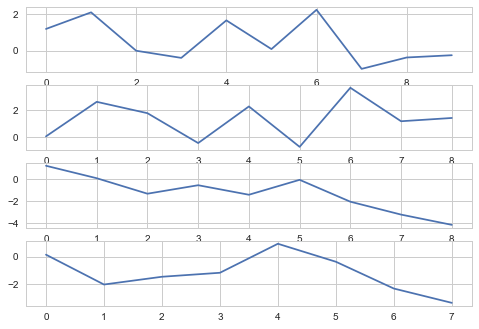

In [443]:
plt.subplot(4,1,1)
plt.plot(e1)
plt.subplot(4,1,2)
plt.plot(e2)
plt.subplot(4,1,3)
plt.plot(e3)
plt.subplot(4,1,4)
plt.plot(e4)
plt.show()

***

# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 단, 계수의 부호는 다음 수식을 기준으로 한다. AR 계수의 부호가 일반적인 ARMA 모형과 다를 수 있다.


$$  \phi(L) Y_t = \mu + \psi(L) \varepsilon_t  $$
  

$$
\begin{eqnarray}
  \phi(L) &= 1 + a_1 L + a_2 L^2 + \cdots a_p L^p \\
  \psi(L) &= 1 + b_1 L + b_2 L^2 + \cdots b_q L^q
\end{eqnarray}
$$


$$  Y_t = -a_1 Y_{t-1} - a_2 Y_{t-2} \cdots - a_p Y_{t-p} + \mu + \varepsilon_t + b_1 \varepsilon_{t-1} + b_2 \varepsilon_{t-2} + \cdots b_q \varepsilon_{t-q} $$


다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다.

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + \varepsilon_t + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2}  $$


In [5]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = sm.tsa.ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


### 샘플 시계열 생성

| 메서드, 속성 이름 | 용도 |
|--|--|
| `generate_sample()` | 주어진 ARMA 모형에서 나올 수 있는 시계열을 무작위로 생성 |

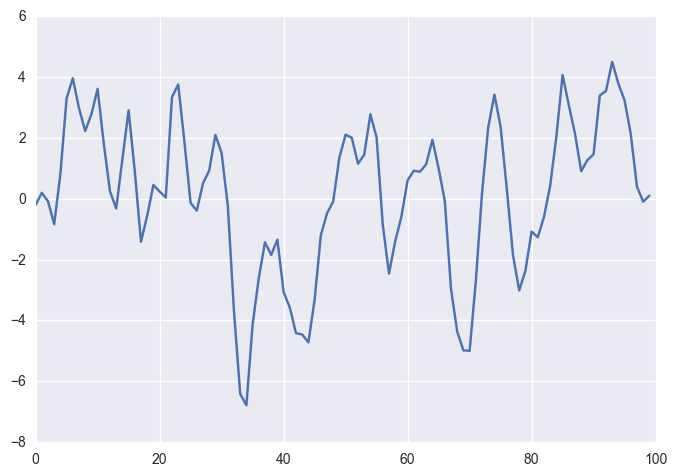

In [6]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

### 특성 분석

| 메서드, 속성 이름 | 	용도 |
|--|--|
| `isstationary` |  	모형 안정성(stability) |
| `isinvertible` | 	모형 가역성(invertibility) |
| `acovf()` | 	이론적인 자기 공분산(autocovariance) 값 |
| `acf()` | 	이론적인 자기 상관계수(autocorrelation) 값 |
| `pacf()` | 	이론적인 자기 편상관계수(partial autocorrelation) 값 |

True
True


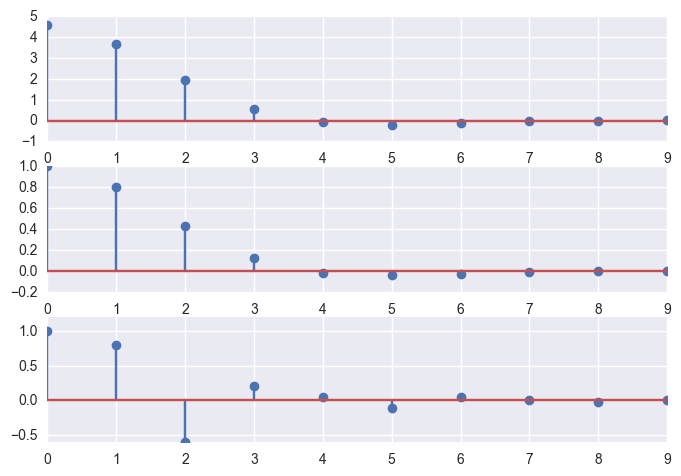

In [7]:
print(m.isstationary)
print(m.isinvertible)
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

## `ARMA` 및 `ARMAResults` 클래스 사용법

`ARMA` 및 `ARMAResults` 클래스는 미리 계수가 정해진 이론적 모형이 아니라 주어진 자료로부터 모형을 추정할 때 사용하는 클래스이다. 사용 방법은 다음과 같다.


1. 우선 주어진 자료와 차수를 입력변수로 `ARMA` 객체를 생성하고
2. `ARMA.fit()` 메서드를 사용하여 추정결과를 `ARMAResults` 클래스 객체로 출력한다.


In [8]:
m2 = sm.tsa.ARMA(x, (2, 2))
print(type(m2))
r = m2.fit(disp=False)
print(type(r))
print(r.summary())

<class 'statsmodels.tsa.arima_model.ARMA'>
<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Fri, 04 Nov 2016   AIC                            300.462
Time:                        05:58:54   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.17

`ARMA` 클래스 객체는 모델과 자료에 관한 정보를 다음과 같은 속성값에 나누어 저장한다.

| 속성 이름 | 	용도 | 
|--|--|
|`endog` |  	원자료 |
|`endog_names` |  	원자료 변수명 |

`ARMAResults` 클래스 객체는 추정 결과 정보를 다음과 같은 속성값에 나누어 저장한다.

|속성/메서드 이름 |	용도 |
|-|-|
|`model`|  	추정 자료와 모형 차수 등을 가진 ARMA 클래스 객체 |
|`k_ar`|  	AR 차수 |
|`k_ma`|  	MA 차수 |
|`arparams`|  	추정된 AR 계수 |
|`maparams`|  	추정된 MA 계수 |
|`params`|  	추정된 전체 계수 (trend 계수 포함) |
|`bse`|  	추정된 전체 계수의 표준 오차 |
|`tvalues`|  	추정된 계수의 t statistics | 
|`pvalues`|  	추정된 계수의 t statistics에 대한 p value |
|`conf_int()`|  	추정된 계수의 신뢰구간 계산 |
|`llf`|  	Log Likelihood 값 |
|`aic`|  	AIC 값 |
|`bic`|  	BIC 값 |
|`hqic`|  	HQIC 값 |
|`fittedvalues`|  	추정 모형에 의한 예측값 |
|`resid`|  	추정 모형에 의한 잔차항(Residuals) |
|`sigma2`|  	추정 모형에 의한 잔차항의 분산 |

In [9]:
r.arparams

array([ 0.65927044, -0.09655685])

In [10]:
r.maparams

array([ 0.84051327,  0.50663556])

In [11]:
r.params

array([ 0.11519269,  0.65927044, -0.09655685,  0.84051327,  0.50663556])

In [12]:
r.bse

array([ 0.5326167 ,  0.17061559,  0.15928805,  0.14462623,  0.10919882])

In [13]:
r.tvalues

array([ 0.2162769 ,  3.86406928, -0.60617763,  5.81162401,  4.63957017])

In [14]:
r.pvalues

array([  8.29235644e-01,   2.03786948e-04,   5.45842536e-01,
         8.23426492e-08,   1.11581289e-05])

In [15]:
r.conf_int()

array([[-0.92871686,  1.15910224],
       [ 0.32487004,  0.99367085],
       [-0.40875569,  0.21564199],
       [ 0.55705107,  1.12397548],
       [ 0.29260982,  0.72066131]])

In [16]:
r.llf

-144.2310133702841

In [17]:
r.aic

300.4620267405682

In [18]:
r.bic

316.09304785649675

In [19]:
r.hqic

306.78818225026305

In [20]:
r.sigma2

1.0211629247456515

In [21]:
r.fittedvalues

array([ 0.11519269, -0.15507026,  0.4074045 , -0.32549481, -1.12728968,
        2.01300422,  4.15862965,  2.80999898,  1.66196731,  1.78482031,
        2.77478581,  3.3608373 ,  0.01130111, -0.56146004,  0.13649941,
        2.03773311,  3.15051016, -1.09364652, -2.37881992,  1.18675751,
        0.70544452, -0.6032755 ,  0.35389399,  5.08199194,  2.59672296,
       -0.35486093, -0.40722676, -0.07335295,  0.91412445,  0.91161421,
        2.34109655,  0.72959897, -1.46840036, -4.72965904, -6.36754383,
       -5.00642204, -1.50003782, -1.76064037, -0.92362572, -1.64024799,
       -0.87929323, -3.5241609 , -3.16252245, -3.59388939, -3.82548872,
       -3.819372  , -1.72632021,  0.25874549, -0.51260491,  0.02249649,
        2.29116781,  1.82323764,  1.22221369,  0.6435458 ,  1.52794679,
        3.19042343,  0.75097735, -2.66935665, -2.12888137,  0.08842869,
       -0.40768758,  1.00974197,  1.03555464,  0.37254596,  1.27416891,
        2.15642872, -0.11340563, -0.65532922, -3.81881134, -4.16

In [22]:
r.resid

array([-0.31990035,  0.34742287, -0.49173635, -0.51157753,  1.94332071,
        1.28494473, -0.20253082,  0.16241622,  0.5629947 ,  0.98570796,
        0.83339973, -1.55262608,  0.2277751 ,  0.24269445,  1.16261462,
        0.8622386 , -2.25224723, -0.32030573,  1.82054461, -0.73582411,
       -0.46832856,  0.64103279,  2.98521966, -1.32956526, -0.72093618,
        0.21517924,  0.01483063,  0.57788961,  0.00968395,  1.18284912,
       -0.84093968, -0.95272085, -2.23420212, -1.68382745, -0.41675341,
        0.87095744, -1.10859146,  0.33105512, -0.92510779,  0.29463329,
       -2.18300881, -0.05281819, -1.25213139, -0.86572926, -0.89326883,
        0.49223101,  0.51730472, -0.74169631,  0.4261995 ,  1.33465477,
       -0.18854392,  0.1789462 , -0.07329837,  0.80103222,  1.24442848,
       -1.17718748, -1.61625254,  0.21061513,  0.73173991, -0.68142308,
        1.01089352, -0.08962728, -0.15087846,  0.76014301,  0.66028722,
       -1.15562499,  0.03412409, -2.30839151, -0.54260235, -0.81

또한 `ARMAResults` 클래스 객체는 다음과 같은 유용한 메서드도 제공한다.

| 메서드 이름 	| 용도 |
|--|--|
|`summary()`| 	추정 결과 요약 문자열 |
|`summary2()`| 	추정 결과 요약 문자열 |
|`forecast()`| 	예측 (자료가 끝난 다음의 미래 예측, 신뢰구간 출력) |
|`predict()`| 	예측 (자료 내부의 in-sample 예측도 가능) |
|`plot_predict()`| 	예측 플롯. forecast() 결과를 시각화 |

In [23]:
r.forecast(20)[0]

array([ 0.56132698,  0.48980507,  0.31908624,  0.21344229,  0.16027843,
        0.13542971,  0.12418102,  0.11916441,  0.11694324,  0.11596328,
        0.11553169,  0.11534178,  0.11525824,  0.11522151,  0.11520536,
        0.11519826,  0.11519514,  0.11519377,  0.11519316,  0.1151929 ])

In [24]:
r.predict(100, 120)

array([ 0.56132698,  0.48980507,  0.31908624,  0.21344229,  0.16027843,
        0.13542971,  0.12418102,  0.11916441,  0.11694324,  0.11596328,
        0.11553169,  0.11534178,  0.11525824,  0.11522151,  0.11520536,
        0.11519826,  0.11519514,  0.11519377,  0.11519316,  0.1151929 ,
        0.11519278])

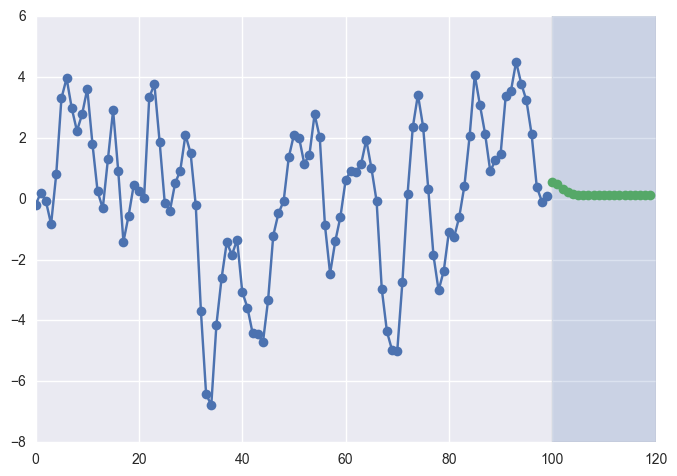

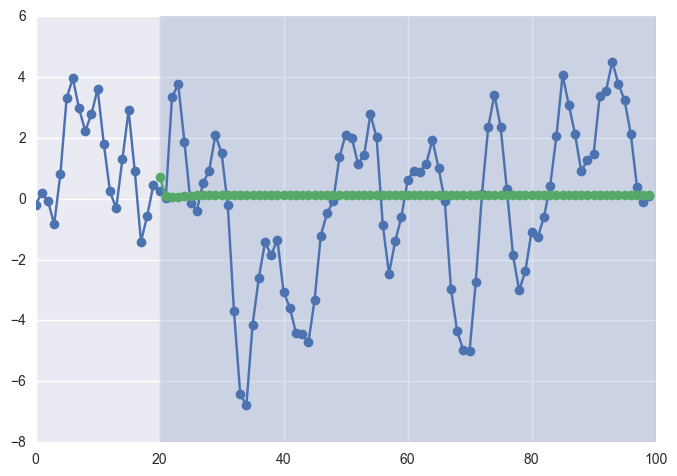

In [25]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show()

***